In [2]:
# import the dataset from sklear
from sklearn.datasets import load_digits
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[42]

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

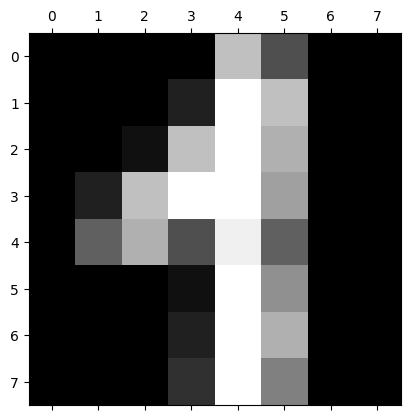

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(digits.images[42])

In [9]:
digits.target[42]

1

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=10000)
mod.fit(X_train,y_train)
mod.score(X_test,y_test)

0.9722222222222222

In [20]:
import pickle
with open("mod.pkl","wb") as f:
    pickle.dump(mod,f)

In [21]:
with open("mod.pkl","rb") as f:
    lmod = pickle.load(f)

In [23]:
lmod.predict([digits.data[42]])

array([1])

<AxesSubplot: >

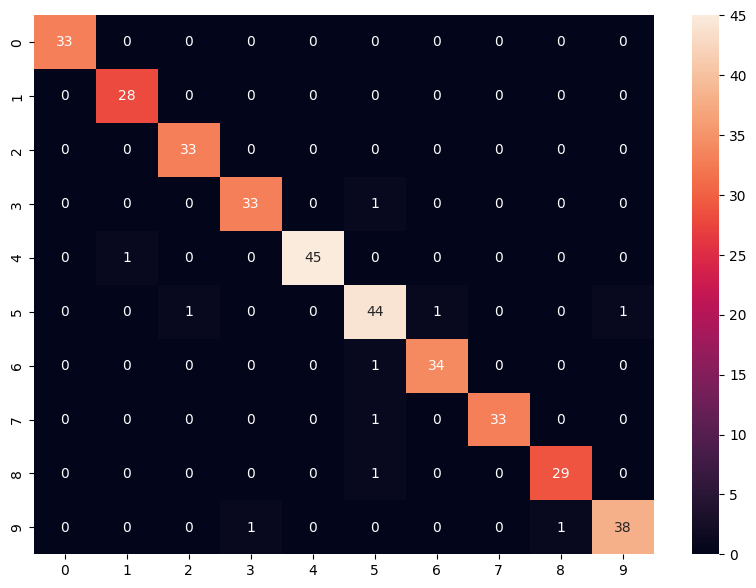

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,lmod.predict(X_test))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

9 3
7 5
3 5
9 8
5 2
4 1
5 9
8 5
6 5
5 6


<Figure size 640x480 with 0 Axes>

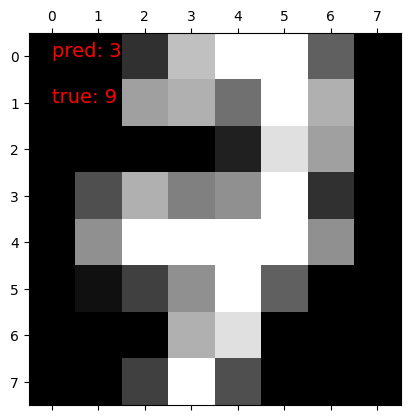

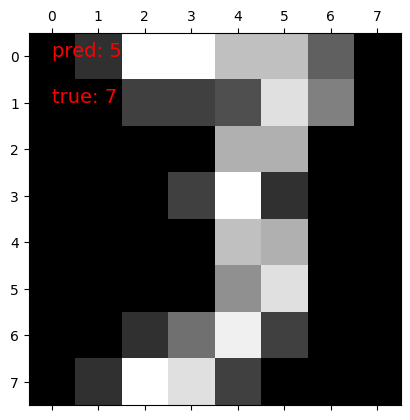

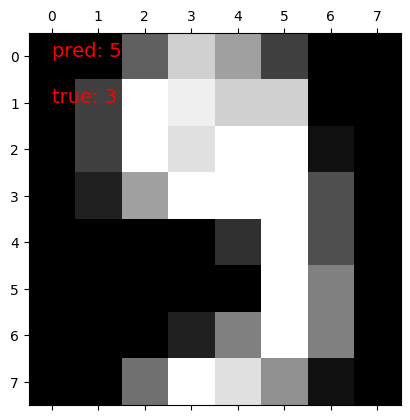

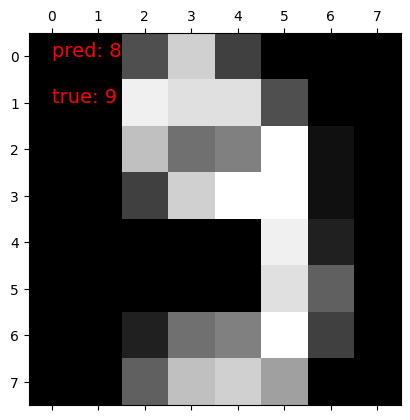

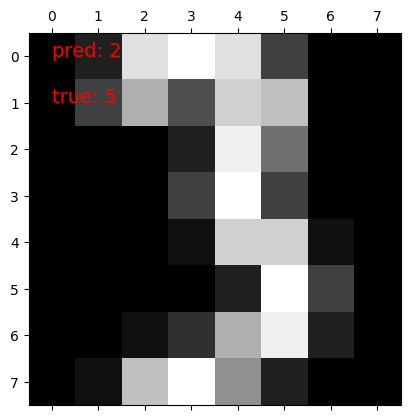

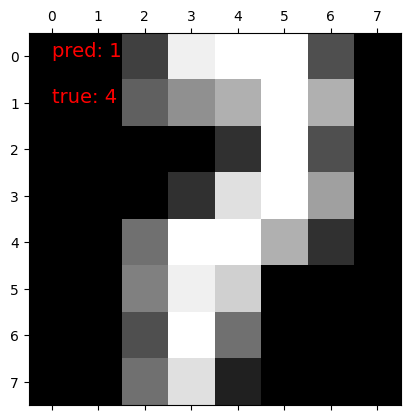

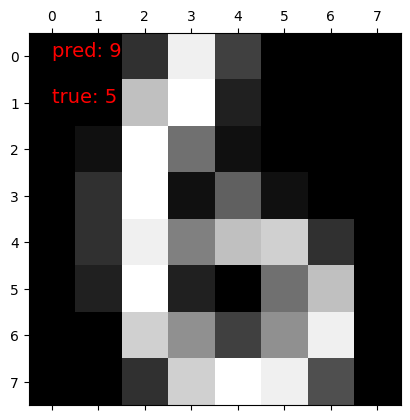

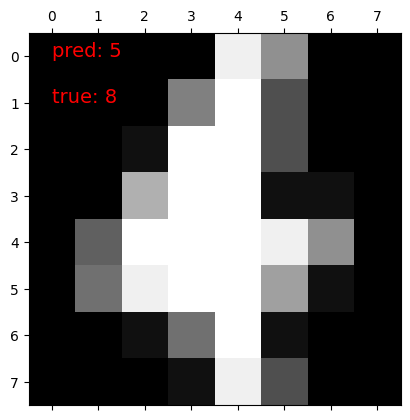

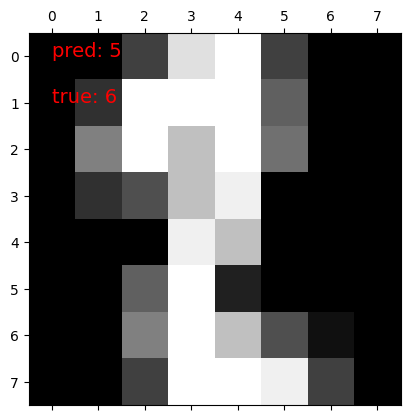

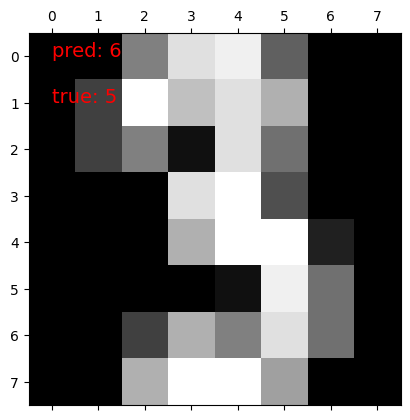

In [44]:
pred = mod.predict(X_test)
for i in range(len(X_test)):
    if y_test[i]!=pred[i]:
        plt.gray()
        plt.matshow(digits.images[i])
        plt.text(x=0,y=0,s="pred: "+str(pred[i]),color='r',fontsize=14)
        plt.text(x=0,y=1,s="true: "+str(y_test[i]),color='r',fontsize=14)